In [1]:
%pip install spotipy
%pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 42.2 MB/s 
     |████████████████████████████████| 246 kB 81.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import statsmodels
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)

%matplotlib inline

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path='C:\Users\hp\Downloads\Spotify_datasets'

# 1. Loading and preparing the data from json files 


In [5]:
file_1 = json.load(open(path+'mpd.slice.0-999.json'))
file_2 = json.load(open(path+'mpd.slice.1000-1999.json'))
file_3 = json.load(open(path+'mpd.slice.2000-2999.json'))
file_4 = json.load(open(path+'mpd.slice.3000-3999.json'))

## 1.1 Take the Playlist column from each the dataframe



In [6]:
df1 = pd.DataFrame(file_1['playlists'])
df2 = pd.DataFrame(file_2['playlists'])
df3 = pd.DataFrame(file_3['playlists'])
df4 = pd.DataFrame(file_4['playlists'])

## 1.2 merge all dataframes together

In [7]:
df = pd.concat([df1,df2,df3,df4], axis = 0)
df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN


## 1.3 Take the tracks column

In [8]:
tracks = df['tracks']

## 1.4 Prepare an empty dataframe

In [9]:
new_columns = ['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'duration_ms',
       'num_artists']

new_df = pd.DataFrame(columns = new_columns)

## 1.5 Filling the empty dataframe with the data 

In [10]:
for i in tqdm(range(len(df))):
    y = [df.iloc[i]] * df['num_tracks'].iloc[i]
    new_df = new_df.append(y,ignore_index = True)

100%|██████████| 4000/4000 [01:14<00:00, 53.73it/s]


In [11]:
pos = [] 
artist_name = [] 
track_uri = [] 
artist_uri = [] 
track_name = []
album_uri = []
duration = []
album_name = []
for track in tracks:
    for j in range(len(track)):
        pos.append(track[j]['pos'])
        artist_name.append(track[j]['artist_name'])
        track_uri.append(track[j]['track_uri'])
        artist_uri.append(track[j]['artist_uri'])
        track_name.append(track[j]['track_name'])
        album_uri.append(track[j]['album_uri'])
        duration.append(track[j]['duration_ms'])
        album_name.append(track[j]['album_name'])

In [12]:
tracks_df = pd.DataFrame()
tracks_df['pos'] = pos 
tracks_df['artist_name'] = artist_name 
tracks_df['track_uri'] = track_uri 
tracks_df['artist_uri'] = artist_uri 
tracks_df['track_name'] = track_name 
tracks_df['album_uri'] = album_uri 
tracks_df['duration_song_ms'] = duration 
tracks_df['album_name'] = album_name 

In [13]:
# drop_columns = ['album_uri', 'artist_uri', 'track_uri', 'description', 'tracks']
# final_df = final_df.drop(drop_columns, axis=1)
tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [14]:
new_df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,tracks,description
0,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN
1,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN
2,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN
3,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN
4,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN


## 1.6 Merge the new dataframe with tracks

In [15]:
final_df = pd.concat([new_df, tracks_df], axis = 1)
final_df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,tracks,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name
0,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",NaN,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


## 1.7 Drop unusefull columns

In [16]:
drop_columns = ['pos', 'pid', 'description', 'tracks']
final_df.drop(drop_columns, axis=1, inplace=True)
final_df.head()

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name
0,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


# 2. Extract data from Spotify.

## 2.1 Open a connection with Spotify account

In [17]:
client_credentials_manager = SpotifyClientCredentials(client_id='9107382ae0d34356a7c6e4c21ca22658'
                                                      , client_secret='5957453521f84db5baa1efdcd03411db')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## 2.2 Take the Tracks URL

In [18]:
final_df["track_uri"] = final_df["track_uri"].apply(lambda x: str(x).split(":")[-1])
final_df["track_uri"].head()

0    0UaMYEvWZi0ZqiDOoHU3YI
1    6I9VzXrHxO9rA9A5euc8Ak
2    0WqIKmW4BTrj3eJFmnCKMv
3    1AWQoqb9bSvzTjaLralEkT
4    1lzr43nnXAijIGYnCT8M8H
Name: track_uri, dtype: object

## 2.3 Extract the data from all URLs

In [19]:
all_uri = final_df.track_uri.unique().tolist()

p1, p2, p3, p4, p5 = all_uri[:4000], all_uri[4000:8000], all_uri[8000:12000], all_uri[16000:20000], all_uri[20000:24000]
api_features = []

for uri in tqdm(p1):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████| 4000/4000 [05:31<00:00, 12.08it/s]


In [20]:
for uri in tqdm(p2):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████| 4000/4000 [05:28<00:00, 12.18it/s]


In [21]:
for uri in tqdm(p3):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████| 4000/4000 [05:30<00:00, 12.10it/s]


In [22]:
for uri in tqdm(p4):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████| 4000/4000 [05:30<00:00, 12.11it/s]


In [23]:
for uri in tqdm(p5):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████| 4000/4000 [05:28<00:00, 12.16it/s]


In [24]:
df_api = pd.DataFrame(api_features)

# remove the duplication
df_api.drop_duplicates(inplace=True, ignore_index=True)

# drop the duration_ms column
df_api.drop(columns={"duration_ms"}, inplace=True)

# save the data in csv file
df_api.to_csv('api_dataset.csv', index=False)
df_api = pd.read_csv('api_dataset.csv')
df_api.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,0.77,0.84,5,-3.91,0,0.11,2.49e-02,2.50e-02,0.24,0.92,143.04,audio_features,6I9VzXrHxO9rA9A5euc8Ak,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,4
2,0.66,0.76,2,-6.58,0,0.21,2.38e-03,0.00e+00,0.06,0.70,99.26,audio_features,0WqIKmW4BTrj3eJFmnCKMv,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,4
3,0.89,0.71,4,-6.05,0,0.14,2.01e-01,2.34e-04,0.05,0.82,100.97,audio_features,1AWQoqb9bSvzTjaLralEkT,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,4
4,0.85,0.61,0,-4.60,1,0.07,5.61e-02,0.00e+00,0.31,0.65,94.76,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,4


In [25]:
df = pd.merge(final_df, df_api, left_on='track_uri', right_on='id')
df.head()

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Throwbacks,false,1493424000,52,47,1,6,11532414,37,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,w o r k o u t,false,1500681600,245,225,1,26,55676545,171,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
2,party playlist,false,1504310400,98,93,1,4,21299385,74,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
3,Dance mix,false,1473724800,167,127,1,15,43330767,111,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
4,spin,false,1505347200,14,14,2,5,3617477,13,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4


# 3. Data Cleaning

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144276 entries, 0 to 144275
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              144276 non-null  object 
 1   collaborative     144276 non-null  object 
 2   modified_at       144276 non-null  object 
 3   num_tracks        144276 non-null  object 
 4   num_albums        144276 non-null  object 
 5   num_followers     144276 non-null  object 
 6   num_edits         144276 non-null  object 
 7   duration_ms       144276 non-null  object 
 8   num_artists       144276 non-null  object 
 9   artist_name       144276 non-null  object 
 10  track_uri         144276 non-null  object 
 11  artist_uri        144276 non-null  object 
 12  track_name        144276 non-null  object 
 13  album_uri         144276 non-null  object 
 14  duration_song_ms  144276 non-null  int64  
 15  album_name        144276 non-null  object 
 16  danceability      14

In [27]:
# See an overview of the data
df.describe()

,duration_song_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.44e+05,144276.00,1.44e+05,144276.00,144276.00,144276.00,144276.00,144276.00,1.44e+05,144276.00,144276.00,144276.00,144276.00
mean,2.32e+05,0.63,6.56e-01,5.16,-6.80,0.65,0.10,0.20,2.69e-02,0.18,0.51,121.93,3.96
std,5.36e+04,0.15,1.91e-01,3.64,3.02,0.48,0.10,0.25,1.24e-01,0.14,0.23,28.51,0.29
min,2.06e+02,0.00,3.79e-04,0.00,-39.47,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00
25%,2.01e+05,0.53,5.31e-01,2.00,-8.17,0.00,0.04,0.02,0.00e+00,0.09,0.33,99.93,4.00
50%,2.25e+05,0.63,6.80e-01,5.00,-6.19,1.00,0.05,0.09,1.16e-06,0.12,0.50,120.46,4.00
75%,2.55e+05,0.73,8.05e-01,8.00,-4.79,1.00,0.11,0.30,1.56e-04,0.23,0.68,140.05,4.00
max,1.81e+06,0.99,1.00e+00,11.00,2.77,1.00,0.96,1.00,9.91e-01,1.00,1.00,219.30,5.00


In [28]:
# Check for null values 
df.isnull().sum()

name                0
collaborative       0
modified_at         0
num_tracks          0
num_albums          0
num_followers       0
num_edits           0
duration_ms         0
num_artists         0
artist_name         0
track_uri           0
artist_uri          0
track_name          0
album_uri           0
duration_song_ms    0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
time_signature      0
dtype: int64

In [29]:
# Create an imputer to fill the null values in numerical features with mean
imputer = SimpleImputer(strategy='mean')
df['num_artists'] = imputer.fit_transform(df[['num_artists']])
df['num_albums'] = imputer.fit_transform(df[['num_albums']])
df['num_followers'] = imputer.fit_transform(df[['num_followers']])
df['num_edits'] = imputer.fit_transform(df[['num_edits']])
df['modified_at'] = imputer.fit_transform(df[['modified_at']])

In [30]:
df.head()

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Throwbacks,false,1.49e+09,52,47.0,1.0,6.0,11532414,37.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,w o r k o u t,false,1.50e+09,245,225.0,1.0,26.0,55676545,171.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
2,party playlist,false,1.50e+09,98,93.0,1.0,4.0,21299385,74.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
3,Dance mix,false,1.47e+09,167,127.0,1.0,15.0,43330767,111.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
4,spin,false,1.51e+09,14,14.0,2.0,5.0,3617477,13.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


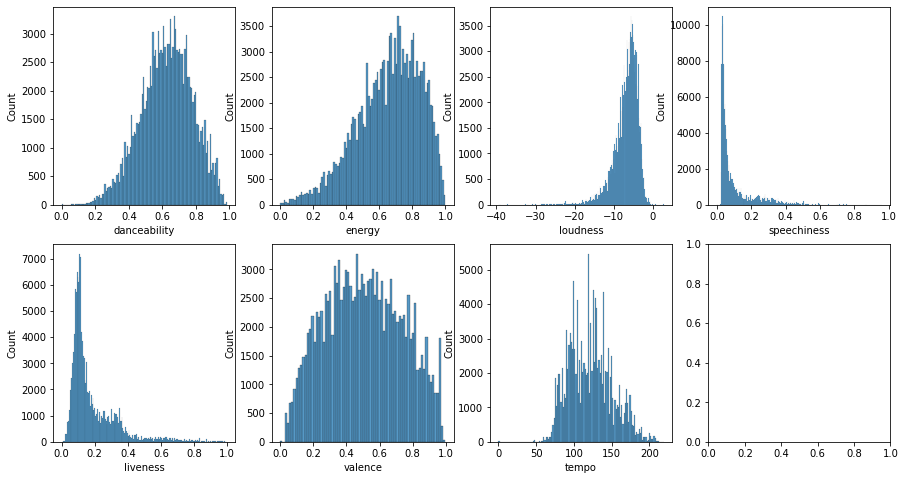

In [31]:
# Display the data in a histogram to check if there any skewed data
fig, ax = plt.subplots(2, 4, figsize=(15, 8))

df.sum(axis=1)

sns.histplot(df.danceability, ax=ax[0][0])
sns.histplot(df.energy, ax=ax[0][1])
sns.histplot(df.loudness, ax=ax[0][2])
sns.histplot(df.speechiness, ax=ax[0][3])
sns.histplot(df.liveness, ax=ax[1][0])
sns.histplot(df.valence, ax=ax[1][1])
sns.histplot(df.tempo, ax=ax[1][2])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

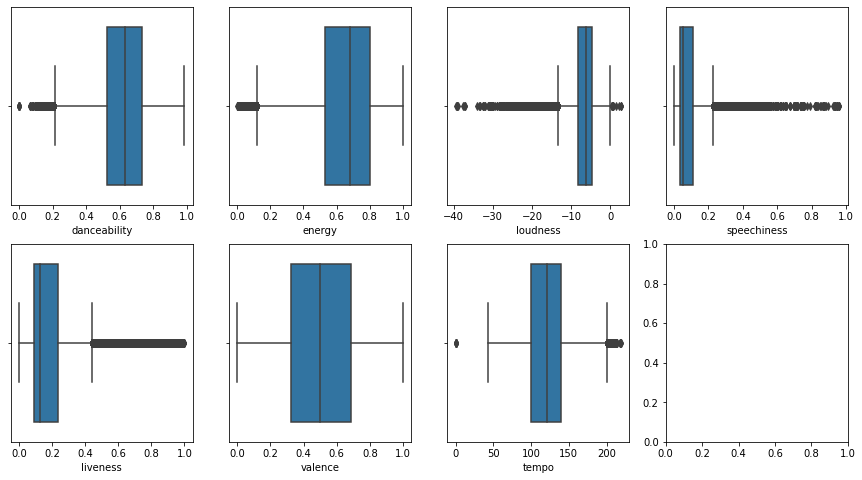

In [32]:
# Display the data in a bosplot to check if there is any outliers
fig, ax = plt.subplots(2, 4, figsize=(15, 8))

sns.boxplot(df.danceability, ax=ax[0][0])
sns.boxplot(df.energy, ax=ax[0][1])
sns.boxplot(df.loudness, ax=ax[0][2])
sns.boxplot(df.speechiness, ax=ax[0][3])
sns.boxplot(df.liveness, ax=ax[1][0])
sns.boxplot(df.valence, ax=ax[1][1])
sns.boxplot(df.tempo, ax=ax[1][2])

## Display the most popular 50 rows

In [33]:
df_2 = pd.DataFrame(df['artist_name'].value_counts(), columns=['artist_name', 'counts'])
df_2['counts'] = df_2['artist_name']
df_2['artist_name'] = df_2.index
df_2.head()

,artist_name,counts
Drake,Drake,2783
Kanye West,Kanye West,1277
Kendrick Lamar,Kendrick Lamar,1224
Rihanna,Rihanna,1067
The Weeknd,The Weeknd,1050


Text(0.5, 1.0, 'Top 50 artists')

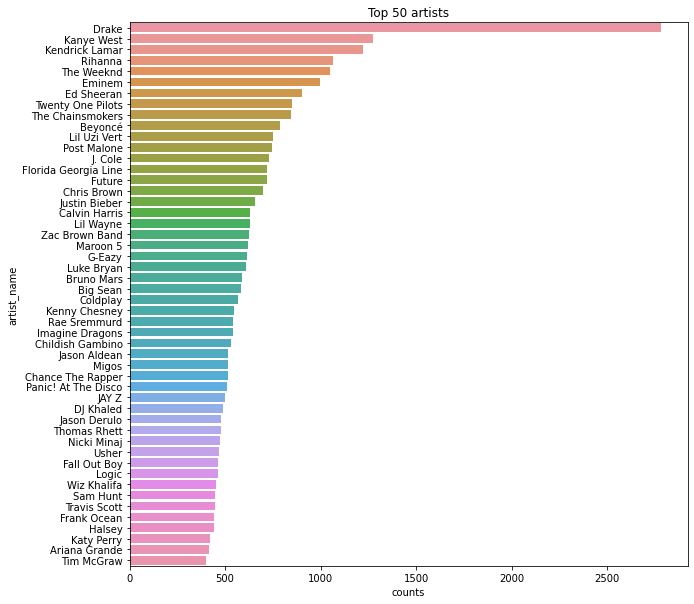

In [34]:
plt.subplots(figsize=(10, 10))
sns.barplot(x='counts', y='artist_name', data=df_2.head(50))
plt.title('Top 50 artists')


In [35]:
df_1 = pd.DataFrame(df['album_name'].value_counts(), columns=['album_name', 'counts'])
df_1['counts'] = df_1['album_name']
df_1['album_name'] = df_1.index
df_1.head()

,album_name,counts
Views,Views,754
Stoney,Stoney,620
Coloring Book,Coloring Book,499
Beauty Behind The Madness,Beauty Behind The Madness,492
DAMN.,DAMN.,486


Text(0.5, 1.0, 'Top 50 albums')

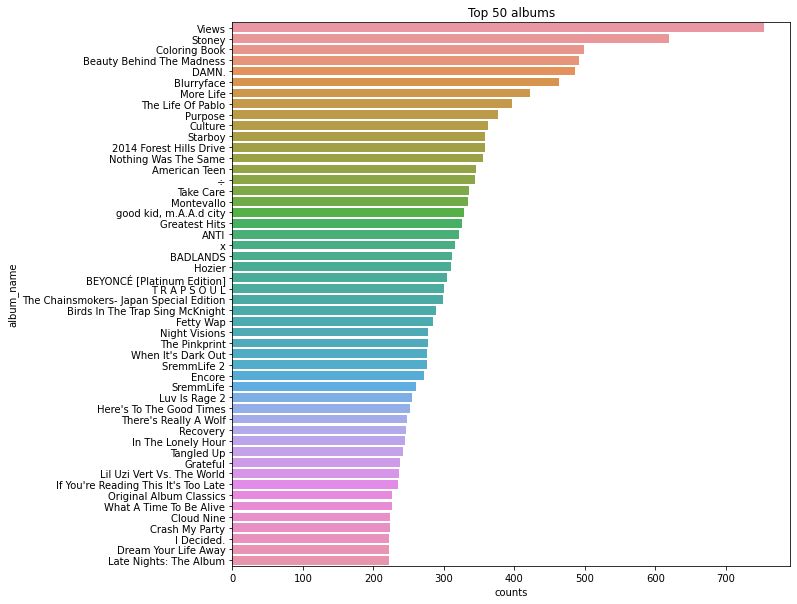

In [36]:
plt.subplots(figsize=(10, 10))
sns.barplot(x='counts', y='album_name', data=df_1.head(50))
plt.title('Top 50 albums')

In [37]:
df_3 = pd.DataFrame(df['track_name'].value_counts(), columns=['track_name', 'counts'])
df_3['counts'] = df_3['track_name']
df_3['track_name'] = df_3.index
df_3.head()

,track_name,counts
Closer,Closer,260
HUMBLE.,HUMBLE.,178
One Dance,One Dance,171
Roses,Roses,165
Ride,Ride,159


Text(0.5, 1.0, 'Top 50 tracks')

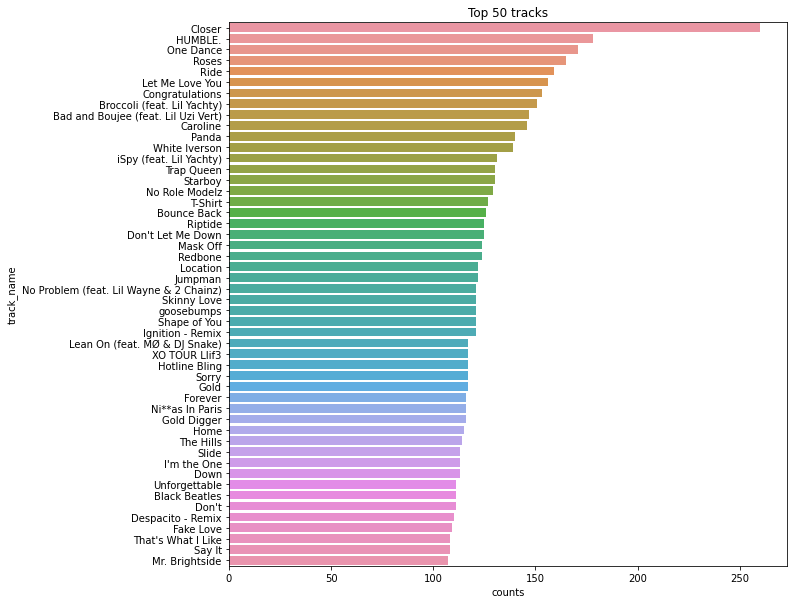

In [38]:
plt.subplots(figsize=(10, 10))
sns.barplot(x='counts', y='track_name', data=df_3.head(50))
plt.title('Top 50 tracks')

In [39]:
df.head()

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Throwbacks,false,1.49e+09,52,47.0,1.0,6.0,11532414,37.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,w o r k o u t,false,1.50e+09,245,225.0,1.0,26.0,55676545,171.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
2,party playlist,false,1.50e+09,98,93.0,1.0,4.0,21299385,74.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
3,Dance mix,false,1.47e+09,167,127.0,1.0,15.0,43330767,111.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
4,spin,false,1.51e+09,14,14.0,2.0,5.0,3617477,13.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4


# Display the coorelation between numerical features

Text(0.5, 1.0, 'Correlation between columns.')

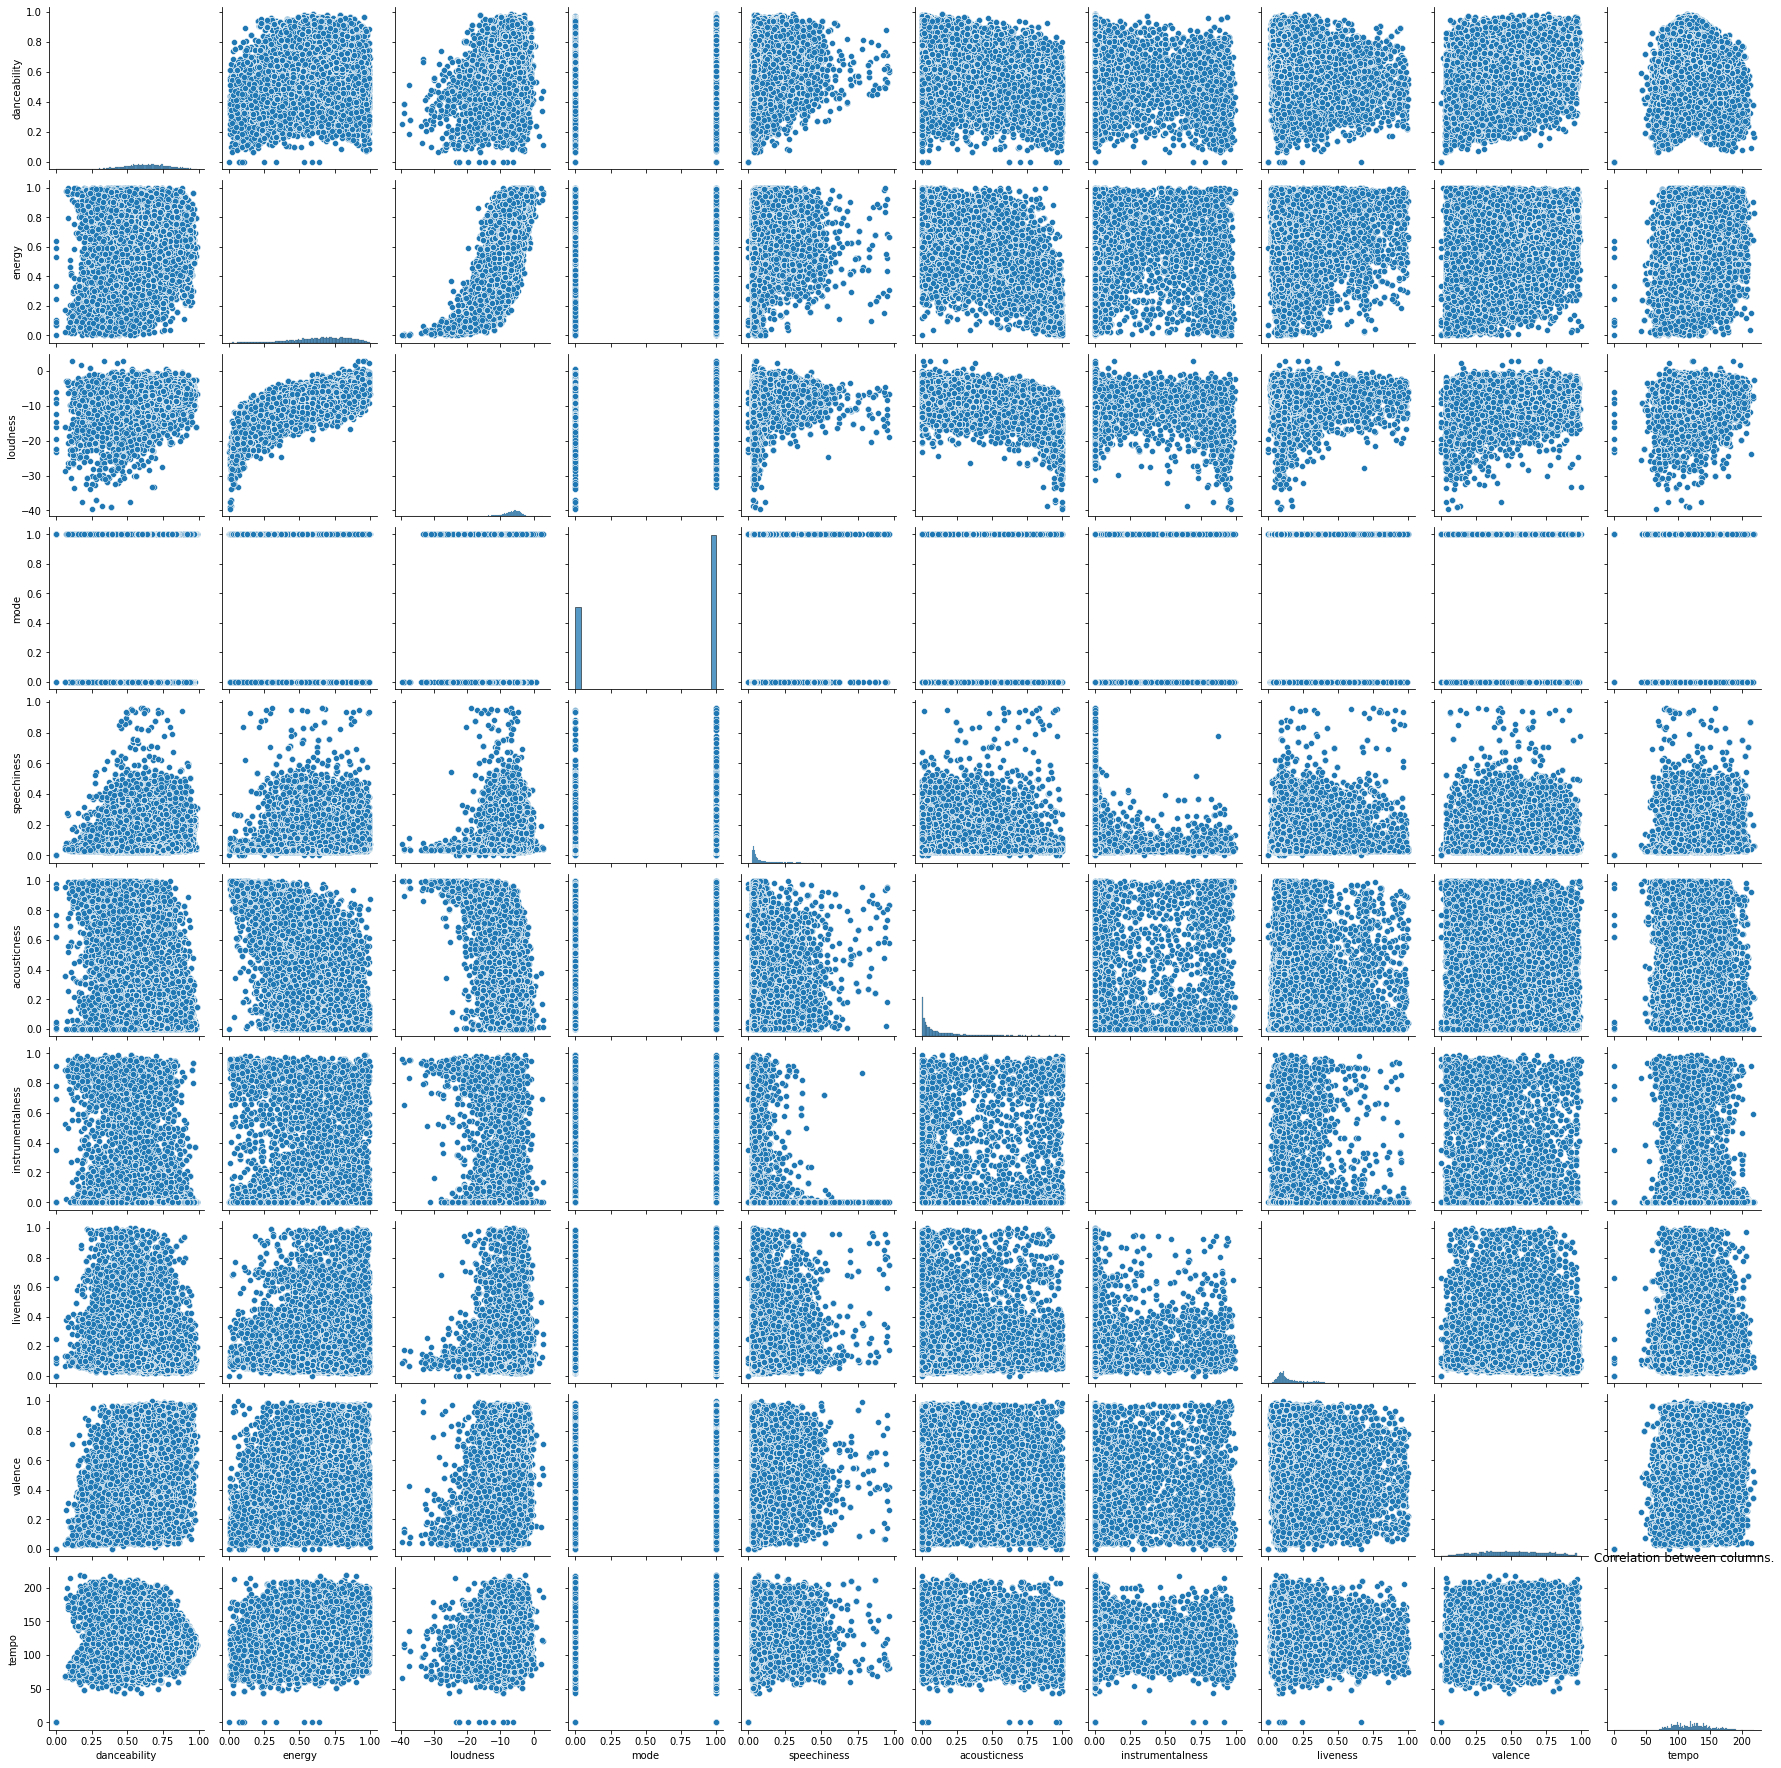

In [40]:
numberical_cols_XY = ['danceability' ,'energy' ,'loudness' ,'mode' ,'speechiness' ,'acousticness' ,'instrumentalness', 'liveness', 'valence', 'tempo']

sns.pairplot(df[numberical_cols_XY])
plt.title('Correlation between columns.')

Text(0.5, 1.0, 'Correlation between columns.')

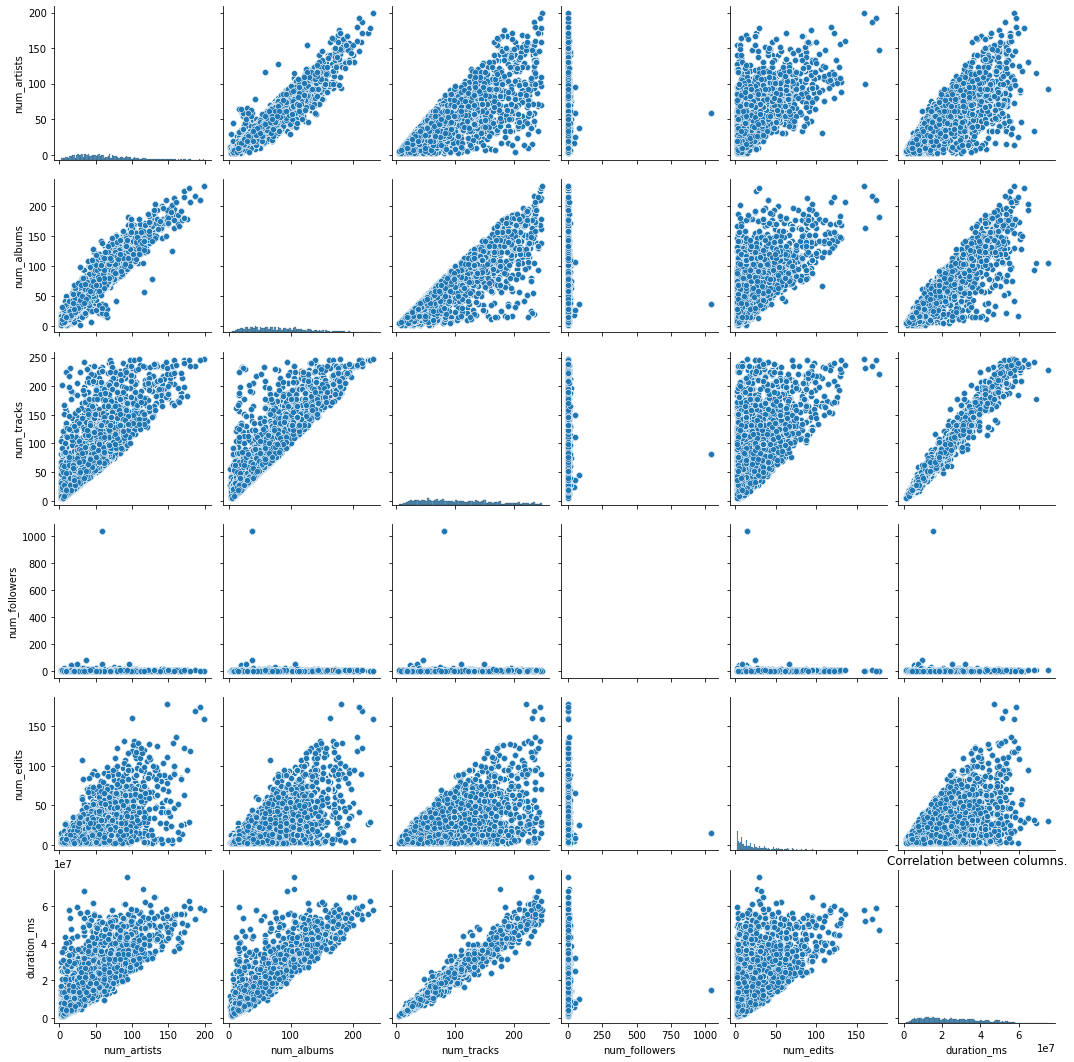

In [41]:
numberical_cols = ['num_artists', 'num_albums', 'num_tracks', 'num_followers', 'num_edits', 'duration_ms']

sns.pairplot(df[numberical_cols])
plt.title('Correlation between columns.')

In [42]:
# create a scaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df[['num_followers', 'num_albums']])

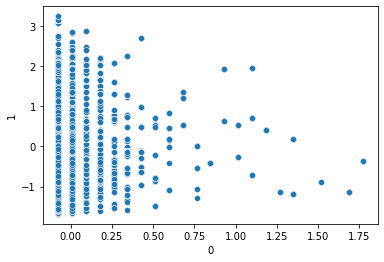

In [43]:
new_scaler_df = pd.DataFrame(scaler_df)
num_albums = new_scaler_df[(new_scaler_df.iloc[:, 1]>-3) & (new_scaler_df.iloc[:, 1]<5)]
num_followers = new_scaler_df[(new_scaler_df.iloc[:, 0]>-1) & (new_scaler_df.iloc[:, 0]<2)]

sns.scatterplot(x=num_followers[0], y=num_albums[1])

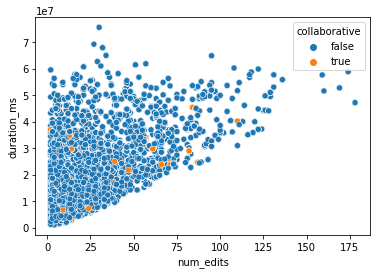

In [44]:
sns.scatterplot(x='num_edits', y='duration_ms', hue='collaborative', data=df)

# 4. Feature Engineering

## 4.1 Transfrom Data to Handle Skewness

### 4.1.1 apply log transformation for right-skewed columns

In [45]:
right_skewed = np.log(df['energy'])
right_skewed.skew()

-2.668634504933705

### 4.1.2 apply power transformation for left-skewed columns

In [46]:
left_skewed_features = ['speechiness', 'liveness']

left_skewed = np.power(df[left_skewed_features], 2)

left_skewed.skew()

speechiness    5.04
liveness       4.25
dtype: float64

In [47]:
log_features = ['modified_at', 'energy', 'loudness', 'time_signature']
features_skewed = np.log(df[log_features])
features_skewed.skew()

modified_at      -1.77
energy           -2.67
loudness          1.02
time_signature     NaN
dtype: float64

In [48]:
exp_features = ['num_artists', 'energy', 'loudness',
                'time_signature', 'num_albums', 'num_tracks'
                , 'num_followers', 'num_edits', 'playlist_duration_ms'
                , 'duration_ms', 'key', 'speechiness', 'acousticness'
                , 'instrumentalness', 'liveness']

features_skewed = np.exp(df[log_features])
features_skewed.skew()

modified_at          NaN
energy             -0.17
loudness          152.43
time_signature      3.92
dtype: float64

## 4.2 Drop Outliers (Apply Tukey’s box plot method to detect and winsorize outliers.)

In [49]:
# Drop Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    
    out = df[ (df[column] < lower_extreme) | (df[column] > upper_extreme) ].index
    
    new_df = df.drop(out)
    return new_df

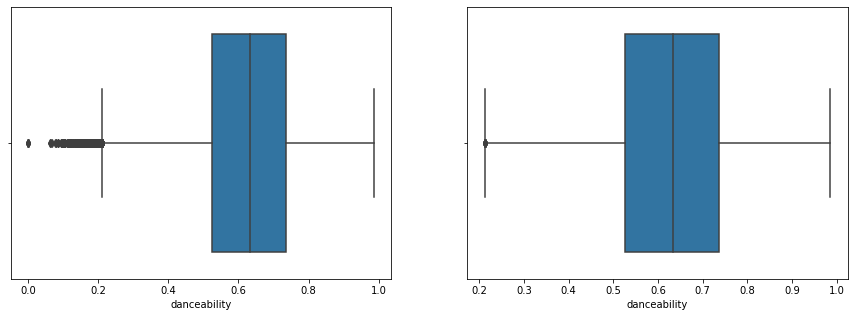

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'danceability')

sns.boxplot(x=df['danceability'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['danceability'], ax=ax[1])

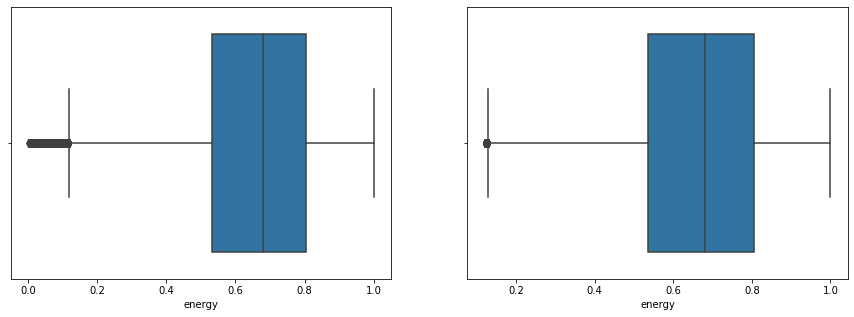

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'energy')

sns.boxplot(x=df['energy'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['energy'], ax=ax[1])

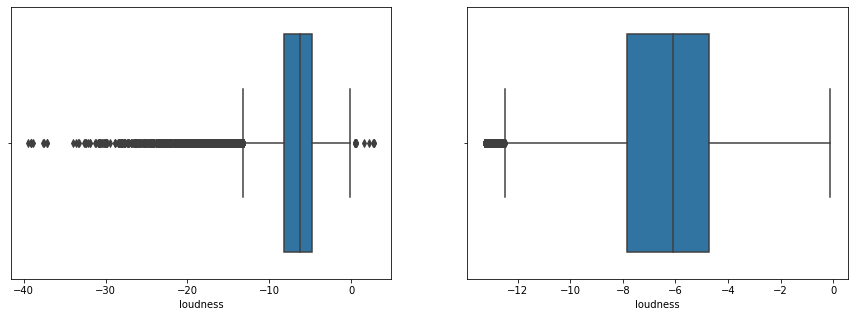

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'loudness')

sns.boxplot(x=df['loudness'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['loudness'], ax=ax[1])

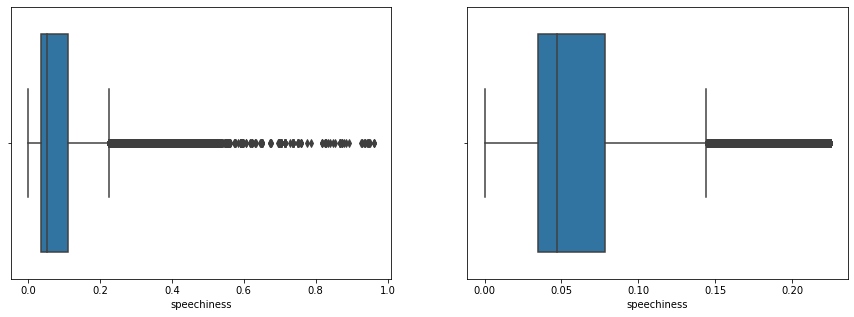

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'speechiness')

sns.boxplot(x=df['speechiness'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['speechiness'], ax=ax[1])

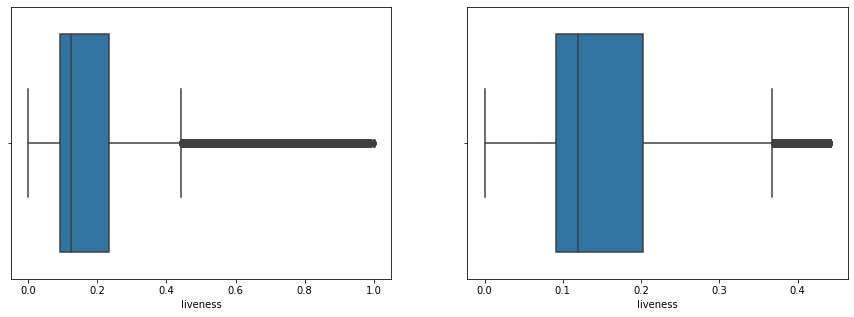

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'liveness')

sns.boxplot(x=df['liveness'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['liveness'], ax=ax[1])

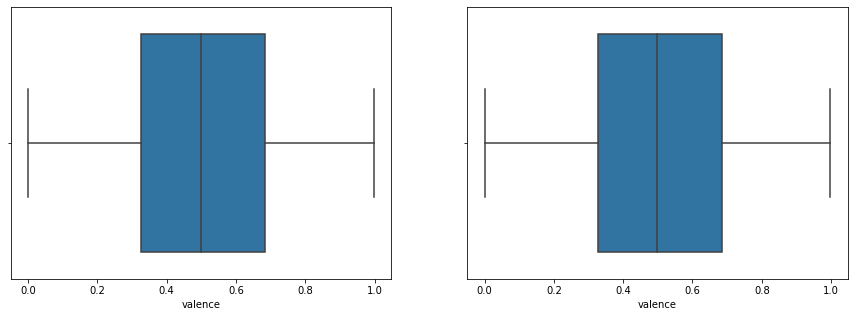

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'valence')

sns.boxplot(x=df['valence'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['valence'], ax=ax[1])

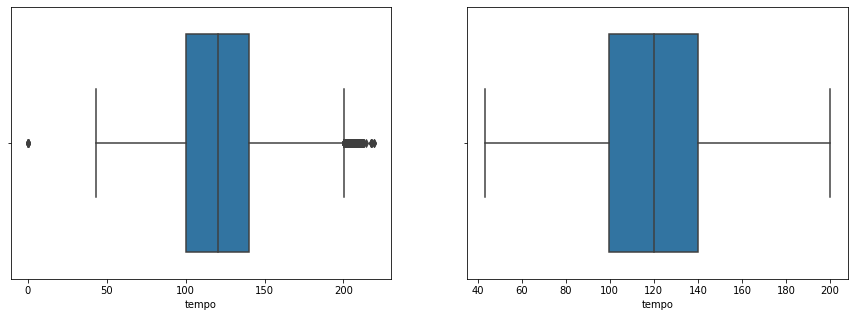

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
drop_out_num_artists = remove_outliers(df, 'tempo')

sns.boxplot(x=df['tempo'], ax=ax[0])
sns.boxplot(x=drop_out_num_artists['tempo'], ax=ax[1])

In [57]:
numeric_cols = ['danceability' ,'energy' ,'loudness' ,'mode' ,'speechiness' ,'acousticness' 
                ,'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [58]:
df.drop('type', axis=1, inplace=True)

## 4.4 Create New Features by Features Interaction

In [59]:
Poly = PolynomialFeatures(interaction_only=True, include_bias=False)
ploy_features = Poly.fit_transform(df[numeric_cols])

In [60]:
# Merge the dataframe with new features 
new_df = pd.concat([df, pd.DataFrame(ploy_features[:, 12:])], axis=1)
new_df.head()

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,artist_name,track_uri,artist_uri,track_name,album_uri,duration_song_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,Throwbacks,false,1.49e+09,52,47.0,1.0,6.0,11532414,37.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,0.73,-6.42,0.0,0.11,0.03,6.30e-03,0.04,0.73,113.42,1.04e+07,3.62,-5.78,0.0,0.1,0.03,5.67e-03,0.04,0.66,102.0,9.38e+06,3.25,-0.0,-0.86,-0.22,-0.05,-0.33,-5.76,-891.4,-8.19e+07,-28.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.76e-03,8.43e-04,5.70e-03,0.1,15.18,1.40e+06,0.48,2.17e-04,1.46e-03,0.03,3.9,3.59e+05,0.12,3.28e-04,5.65e-03,0.87,80380.93,0.03,0.04,5.91,5.43e+05,0.19,101.62,9.34e+06,3.24,1.45e+09,501.84,4.61e+07
1,w o r k o u t,false,1.50e+09,245,225.0,1.0,26.0,55676545,171.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,0.73,-6.42,0.0,0.11,0.03,6.30e-03,0.04,0.73,113.42,5.03e+07,3.62,-5.78,0.0,0.1,0.03,5.67e-03,0.04,0.66,102.0,4.53e+07,3.25,-0.0,-0.86,-0.22,-0.05,-0.33,-5.76,-891.4,-3.96e+08,-28.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.76e-03,8.43e-04,5.70e-03,0.1,15.18,6.74e+06,0.48,2.17e-04,1.46e-03,0.03,3.9,1.73e+06,0.12,3.28e-04,5.65e-03,0.87,388065.52,0.03,0.04,5.91,2.62e+06,0.19,101.62,4.51e+07,3.24,6.99e+09,501.84,2.23e+08
2,party playlist,false,1.50e+09,98,93.0,1.0,4.0,21299385,74.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,0.73,-6.42,0.0,0.11,0.03,6.30e-03,0.04,0.73,113.42,1.93e+07,3.62,-5.78,0.0,0.1,0.03,5.67e-03,0.04,0.66,102.0,1.73e+07,3.25,-0.0,-0.86,-0.22,-0.05,-0.33,-5.76,-891.4,-1.51e+08,-28.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.76e-03,8.43e-04,5.70e-03,0.1,15.18,2.58e+06,0.48,2.17e-04,1.46e-03,0.03,3.9,6.62e+05,0.12,3.28e-04,5.65e-03,0.87,148456.71,0.03,0.04,5.91,1.00e+06,0.19,101.62,1.73e+07,3.24,2.67e+09,501.84,8.52e+07
3,Dance mix,false,1.47e+09,167,127.0,1.0,15.0,43330767,111.0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,0.73,-6.42,0.0,0.11,0.03,6.30e-03,0.04,0.73,113.42,3.92e+07,3.62,-5.78,0.0,0.1,0.03,5.67e-03,0.04,0.66,102.0,3.52e+07,3.25,-0.0,-0.86,-0.22,-0.05,-0.33,-5.76,-891.4,-3.08e+08,-28.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.76e-03,8.43e-04,5.70e-03,0.1,15.18,5.24e+06,0.48,2.17e-04,1.46e-03,0.03,3.9,1.35e+06,0.12,3.28e-04,5.65e-03,0.87,302015.45,0.03,0.04,5.91,2.04e+06,0.19,101.62,3.51e+07,3.24,5.44e+09,501.84,1.73e+08
4,spin,fal

## 4.5 Perform PCA

In [61]:
features = ['name', 'collaborative', 'artist_name', 'track_uri', 'artist_uri', 'track_name', 'album_uri', 'album_name', 'id', 'uri', 'track_href', 'analysis_url']
numeric_df = new_df.drop(features, axis=1)

pca = PCA(n_components=5)
pca_data = pca.fit_transform(numeric_df)
pd.DataFrame(pca_data).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2,3,4
0,-1.64e+09,-1.94e+07,-1.19e+07,1.01e+07,7.59e+06
1,3.91e+09,5.75e+07,-1.11e+07,-1.31e+07,3.81e+07
2,-4.15e+08,-2.38e+06,-2.09e+07,5.93e+06,1.43e+07
3,2.35e+09,3.58e+07,1.35e+07,-9.26e+06,2.98e+07
4,-2.64e+09,-3.32e+07,-2.52e+07,1.56e+07,1.99e+06


## 4.6 Feature Scaling

In [62]:
numeric_cols = ['danceability' ,'energy' ,'loudness' ,'mode' ,'speechiness' ,'acousticness' 
                ,'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

num_df = df[numeric_cols]
X = num_df.iloc[:, :-1]
y = num_df.iloc[:, -1]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X, y)

In [63]:
df[numeric_cols]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.90,0.81,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,11532414,4
1,0.90,0.81,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,55676545,4
2,0.90,0.81,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,21299385,4
3,0.90,0.81,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,43330767,4
4,0.90,0.81,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,3617477,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144271,0.57,0.32,-16.73,1,0.11,0.68,2.02e-04,0.09,0.39,104.52,18653965,4
144272,0.61,0.27,-14.76,1,0.04,0.84,1.77e-03,0.69,0.39,105.44,36233599,3
144273,0.61,0.27,-14.76,1,0.04,0.84,1.77e-03,0.69,0.39,105.44,43391076,3
144274,0.46,0.81,-7.33,1,0.10,0.45,4.44e-03,0.94,0.79,126.00,36233599,4


## 4.7 Drop Useless Features

In [64]:
drop_features = ['name', 'artist_name', 'track_name', 'album_name']
new_df.drop(drop_features, axis=1, inplace=True)
new_df.dropna(axis=1, inplace=True)

# 5. Modeling

In [65]:
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normalization = df.select_dtypes(include=datatypes)
for col in normalization.columns:
  MinMaxScaler(col)

kmeans = KMeans(n_clusters=13)

features = kmeans.fit_predict(normalization)
df['features'] = features
MinMaxScaler(df['features'])

MinMaxScaler(feature_range=0         0
1         8
2         8
3         9
4         2
         ..
144271    4
144272    7
144273    2
144274    7
144275    0
Name: features, Length: 144276, dtype: int32)

In [99]:
# df.to_csv('final df.csv')

## Simple Spotify Recommender

In [119]:
class Spotify_Recommendation():
  def __init__(self, dataset):
    self.dataset = dataset

  def search(self, user_songs, amount):
    same_tracks_lst = []
    columns = ['artist_name', 'track_name', 'album_name']

    for track in df.track_name.str.lower():
        same_tracks_lst.append(((user_songs.lower() == track.lower()) or (user_songs.lower() in track.lower())))

    song = self.dataset[same_tracks_lst]
    song = song[columns]
    song = song.drop_duplicates()
    return song[:amount]
    

  def recommend(self, user_songs, amount=1):
    distance=[]
    # try:

    # Take the identitcal songs
    same_tracks_lst = []
    print('- Processing...')
    for track in tqdm(df.track_name.str.lower()):
        same_tracks_lst.append(((user_songs.lower() == track) or (user_songs.lower() in track)))

    song = self.dataset[same_tracks_lst].head(1).values[0]

    # Take the other songs
    other_tracks_lst = []
    print('\n- Prepare the recommended songs...')
    for track in tqdm(df.track_name.str.lower()):
        other_tracks_lst.append(user_songs.lower() != track)

    rec = self.dataset[other_tracks_lst]

    # except:
    #   # if there where any error display this message
    #   print('\nsomething goes wrong...')
    #   return

    print('\n- Almost Finished...')
    for songs in tqdm(rec.values):
      d = 0

      for col in np.arange(len(rec.columns)):

        # Take the numerical columns only
        if not col in [0, 1, 9, 10, 11, 12, 13, 15, 27, 28, 29, 30, 31]:
          '''
          - Compare the danceability ,energy ,loudness
            ,mode ,speechiness ,acousticness ,instrumentalness
            , liveness, valence and tempo between recommended songs and users songs

          '''
          d = d + np.absolute(float(song[col]) - float(songs[col]))

      distance.append(d)

    rec['distance'] = distance
    rec = rec.sort_values('distance')
    columns = ['artist_name', 'track_name', 'album_name']
    
    return rec[columns][:amount]


In [ ]:
recomendations = Spotify_Recommendation(df)
search_songs = recomendations.recommend('snowman', 10)
search_songs

In [121]:
recommended_songs = recomendations.recommend('don\'t let me down', 10)
recommended_songs

- Processing...


100%|██████████| 144276/144276 [00:00<00:00, 2039518.59it/s]


- Prepare the recommended songs...



100%|██████████| 144276/144276 [00:00<00:00, 2404220.15it/s]



- Almost Finished...


100%|██████████| 144151/144151 [00:13<00:00, 10438.84it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artist_name,track_name,album_name
9581,Blackmill,Don't Let Me Down (feat. Cat Martin),Miracle
9582,Blackmill,Don't Let Me Down (feat. Cat Martin),Miracle
9822,Jamie xx,Far Nearer,Far Nearer
9816,DJ Shadow,Building Steam With A Grain Of Salt,Endtroducing.....
9817,DJ Shadow,Building Steam With A Grain Of Salt,Endtroducing.....
9853,TwoThirds,Epiphany,Epiphany
9575,Passion Pit,The Reeling - Calvin Harris Remix,Manners
9585,Bonobo,Nothing Owed,Dial 'M' for Monkey
9818,Cut Chemist,The Garden,The Audience's Listening
9416,Pretty Lights,Change Is Gonna Come,Filling up the City Skies (Disc 1)


In [122]:
search_songs = recomendations.search('don\'t let me down', 10)
search_songs

,artist_name,track_name,album_name
9581,Blackmill,Don't Let Me Down (feat. Cat Martin),Miracle
26846,The Chainsmokers,Don't Let Me Down,The Chainsmokers- Japan Special Edition
47651,Keith Urban,Sun Don't Let Me Down,Ripcord
81616,The Chainsmokers,Don't Let Me Down - Illenium Remix,Don't Let Me Down (Remixes)
111100,The Beatles,Don't Let Me Down - Remastered,The Beatles 1967 - 1970
126481,The Chainsmokers,Don't Let Me Down - W&W Remix,Don't Let Me Down (Remixes)
137102,The Chainsmokers,Don't Let Me Down - Hardwell & Sephyx Remix,The Chainsmokers- Japan Special Edition
